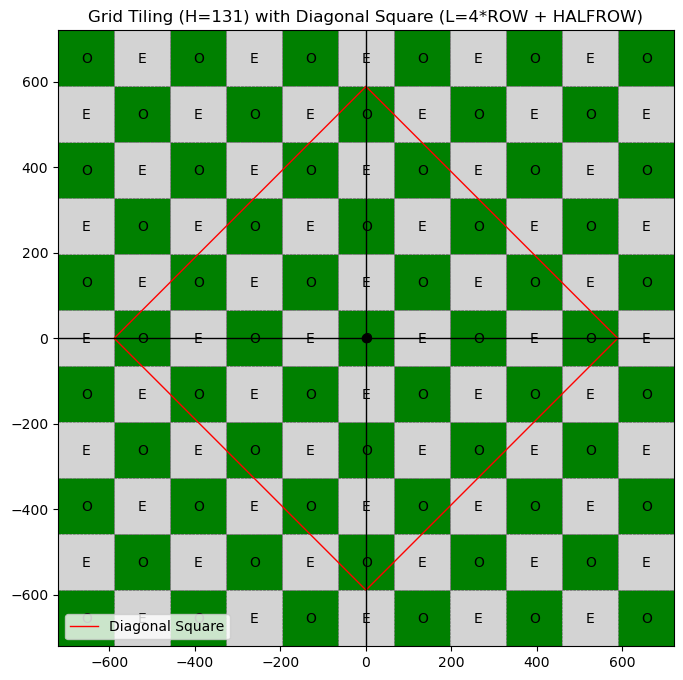

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque


def draw_grid_with_diagonal(H, L):
    half_H = H / 2
    extend = L
    total_extend = extend + H - ((extend - half_H) % H)

    bounds = [-total_extend - H, total_extend + H]

    diagonal_square = np.array([
        [0, L],
        [L, 0],
        [0, -L],
        [-L, 0],
        [0, L]
    ])

    fig, ax = plt.subplots(figsize=(8, 8))

    grid_offsets = np.arange(-total_extend, total_extend + H, H)
    visited = set()
    queue = deque()
    origin = (0, 0)
    queue.append((origin, 0))  # ((x, y), step)

    # Directions: 4-neighbors (up, down, left, right)
    directions = [(H, 0), (-H, 0), (0, H), (0, -H)]

    while queue:
        (x, y), step = queue.popleft()
        if (x, y) in visited:
            continue
        visited.add((x, y))

        color = 'green' if step % 2 == 0 else 'lightgray'
        ax.text(x-10, y-10, 'O' if step % 2 == 0 else 'E')
        rect = plt.Rectangle((x-H/2, y-H/2), H, H, facecolor=color,
                             edgecolor='gray', linestyle='--', linewidth=0.5)
        ax.add_patch(rect)

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if bounds[0] <= nx <= bounds[1] and bounds[0] <= ny <= bounds[1]:
                if (nx, ny) not in visited:
                    queue.append(((nx, ny), step + 1))

    # Draw the grid outlines
    for dx in grid_offsets:
        for dy in grid_offsets:
            square = plt.Rectangle(
                (dx, dy), H, H, fill=False, edgecolor='gray', linestyle='--', linewidth=0.5)
            ax.add_patch(square)

    # Draw the diagonal square
    ax.plot(diagonal_square[:, 0], diagonal_square[:, 1],
            'r-', linewidth=1, label='Diagonal Square')

    # Mark center
    ax.plot(0, 0, 'ko')

    ax.set_aspect('equal')
    ax.set_xlim(bounds)
    ax.set_ylim(bounds)
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_title(
        f"Grid Tiling (H={H}) with Diagonal Square (L={(int)(L/H)}*ROW + HALFROW)")
    ax.legend()

    plt.grid(False)
    plt.show()


H = 131
L = 65 + 131 * 4
draw_grid_with_diagonal(H, L)